<a href="https://colab.research.google.com/github/HongWonSeok/STUDY/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **모두의 딥러닝 시즌2 with Pytorch - LAB 03**

Multivaratiate Linear Regression

- 여러개의 정보로 부터 하나의 추측값을 계산하는 것

**목차**

- Multivarate Linear Regression 이론
- Naive Data Representation
- Matrix Data Representatoin
- Multivarate Linear Regression
- nn.Module 소개
- F.mse_loss 소개
- Minibatch Gradient Descent
- PyTorch Dataset and DataLoader

#  Multivarate Linear Rgression

여러개의 정보가 주어질때 하나의 예측값을 계산하는 것

예를들어 쪽지시험의 점수가 73,80,75점을 가질때 기말고사를 몇점을 받을지 예측하는 방법

이것도 Simple Linear Regression과 같이 데이터를 torch.FloatTensor()로 표현가능

In [2]:
import torch

#data
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

**Hypothesis Function**
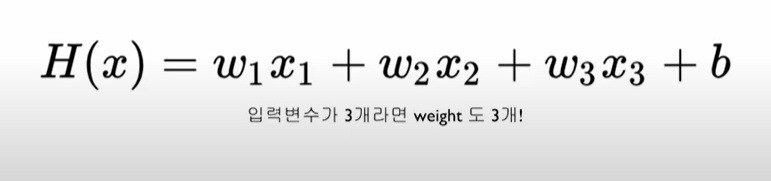




hypothesis function을 계산을 할때 가장 간단한 방법은 아래 사진과 같다 

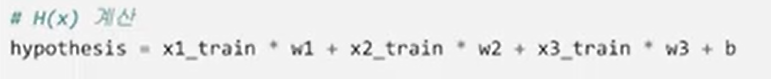

하지만 x에 더많은 정보가 있다면 hypothesis를 계산하는 코드는 점점 더 길어진다.

그래서 matmul()이라는 함수를 사용하면 더 간결하고 빠른 코드가 된다.

hypothesis = x_train.matmul(W) + b // or .mm or @

**Multivarate Cost Function & Gradient Descent**

- MSE로 기존 SImple Linear Regression과 동일
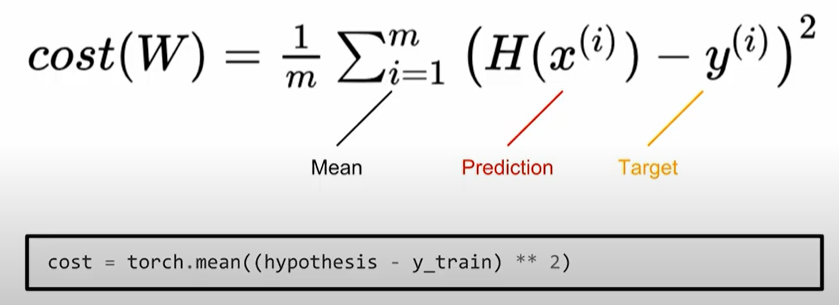


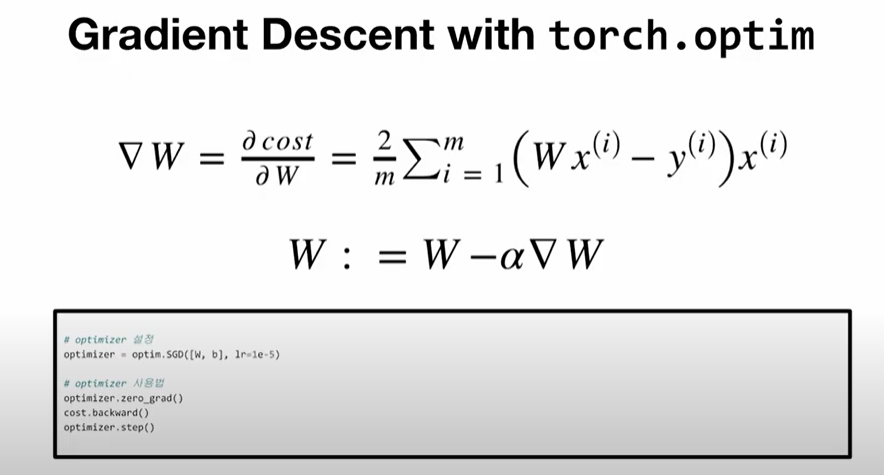

**Full Code**

In [3]:
import torch.optim as optim

# 데이터 정의
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad= True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs +1):

  # H(x) 계산
  hypothesis = x_train.matmul(W) + b # or .mm or @

  # cost 개선
  cost = torch.mean((hypothesis - y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{}  hypothesis: {} cost: {:.6f}'.format(
      epoch,nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20  hypothesis: tensor([0., 0., 0., 0., 0.]) cost: 29661.800781
Epoch    1/20  hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) cost: 9298.520508
Epoch    2/20  hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) cost: 2915.712402
Epoch    3/20  hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) cost: 915.040527
Epoch    4/20  hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) cost: 287.936096
Epoch    5/20  hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) cost: 91.371063
Epoch    6/20  hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) cost: 29.758249
Epoch    7/20  hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) cost: 10.445267
Epoch    8/20  hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) cost: 4.391237
Epoch    9/20  hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) cost: 2.493121
Epoch   

결과를 보게되면 Cost가 점점 0으로 줄어드는 모습을 보이고, H(x)의 값이 점점 y_train값에 가까워진다.  

**nn.Module**

w와 b를 일일이 써주기는 모델이 커질수록 힘들 수 있기 때문에 pytorch에서는 nn.Module을 제공해준다.

In [4]:
# 모델 초기화
W = torch.zeros((3,1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

# H(x) 계산
hypothesis = x_train.matmul(W) + b

In [5]:
import torch.nn as nn

# nn.Module을 상속해서 모델 생성 - 인공신경망을 만드는데 편하게 해 줌
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1) # 입력차원: 3, 출력차원: 1 임을 알려준다.
  # Hypothesis 계산은 forward()에서 한다.
  def forward(self, x):
    return self.linear(x)

#Gradient 계산은 backward()에서 PyTorch가 알아서 해준다 


**F.mse_loss**

PyTorch의 cost Function의 장점
- 다른 cost Function(l1_loss, smooth_l1_loss 등)으로 바꿀때 편리함
- cost Function을 계산할 때 생기는 버그가 없어서 디버깅 할 떄 편함

In [6]:
# cost 계산
cost = torch.mean((hypothesis - y_train) ** 2)

In [7]:
import torch.nn.functional as F

# cost 계산
cost = F.mse_loss(hypothesis, y_train)

**FULL CODE**

In [8]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)

  def forward(self, x):
    return self.linear(x)

In [9]:
# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
# W = torch.zeros((3,1), requires_grad = True)
# b = torch.zeros(1, requires_grad= True)
model = MultivariateLinearRegressionModel()

# optimizer 설정
#------optimizer = optim.SGD([W,b], lr=1e-5)------
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs +1):

  # H(x) 계산
  # hypothesis = x_train.matmul(W) + b # or .mm or @
  hypothesis = model(x_train)

  # cost 개선
  # cost = torch.mean((hypothesis - y_train)**2)
  cost = F.mse_loss(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{}  hypothesis: {} cost: {:.6f}'.format(
      epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
  ))

Epoch    0/20  hypothesis: tensor([68.9410, 85.7720, 82.9600, 90.8004, 65.8008]) cost: 8607.009766
Epoch    1/20  hypothesis: tensor([105.1714, 129.3183, 125.8668, 137.5248,  99.0157]) cost: 2698.155762
Epoch    2/20  hypothesis: tensor([125.4554, 153.6982, 149.8888, 163.6841, 117.6115]) cost: 846.043457
Epoch    3/20  hypothesis: tensor([136.8117, 167.3477, 163.3378, 178.3297, 128.0227]) cost: 265.504883
Epoch    4/20  hypothesis: tensor([143.1696, 174.9895, 170.8674, 186.5293, 133.8515]) cost: 83.536514
Epoch    5/20  hypothesis: tensor([146.7292, 179.2679, 175.0829, 191.1199, 137.1149]) cost: 26.499170
Epoch    6/20  hypothesis: tensor([148.7220, 181.6633, 177.4431, 193.6900, 138.9420]) cost: 8.620911
Epoch    7/20  hypothesis: tensor([149.8377, 183.0043, 178.7644, 195.1289, 139.9649]) cost: 3.017045
Epoch    8/20  hypothesis: tensor([150.4623, 183.7552, 179.5042, 195.9344, 140.5376]) cost: 1.260535
Epoch    9/20  hypothesis: tensor([150.8120, 184.1756, 179.9183, 196.3854, 140.8583]

#Minibatch Gradient Descent

복잡한 머신러닝 모델을 학습하려면 엄청난 양의 데이터가 필요하다.

대부분 데이터셋은 적어도 수십만 개의 데이터를 제공한다. ex)IMAGENET이라는 DataSet은 천만가지가 넘는 이미지가 데이터로 존재한다.

**엄청난 양의 데이터를 한번에 학습 시킬 수 없다.**
- 데이터가 많다는 것은 우리의 모델이 많은 데이터를 학습하면서 더 견교하고 완성돤 예측을 할 수 있다. 그러나 Gradient Descent를 하게되면 너무 데이터가 많아 느리거나 하드웨어적으로 불가능한 경우가 있다. 

**엄청난 양의 데이터를 한번에 학습 시킬 수 없기 때문에 데이터를 균일하게 나누어 학습하는 방법이 Minibatch Gradient Descent이다.**
- 전체데이터를 작은 각각의 Minibatch로 균일하게 나누어 하나하나 학습!

**장단점**
- 업데이트를 좀더 빠르게 할 수 있다.(한번 계산할 때 마다 모든 데이터를 다 쓰지 않기 때문에 한번에 계산할 cost의 양이 줄어 업데이트가 빨라짐)
- 전체데이터를 쓰지 않아서 잘못된 방향으로 업데이트를 할 수도 있다.(그래서 아래에 사진처럼 cost가 거친모습으로 줄어든다)




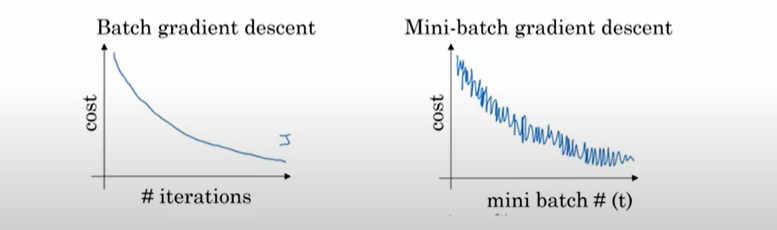

PyTorch Dataset

- (from torch.utils.data import Dataset)을 상속해 새로운 클래스를 만듬으로써 원하는 데이터 셋을 지정가능

In [10]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]]
    self.y_data = [[152], [185], [180], [196], [142]]
  
  # 이 데이터셋의 총 데이터 수
  def __len__(self):
    return len(self.x_data)
  
  # 어떤 인덱스 idx를 받았을 때, 그에 상응하는 입출력 데이터 반환
  def __getitem__(self,idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])

    return x,y

dataset = CustomDataset


PyTorch DataLoader

- 위와 같이 PyTorch dataset을 만들었다면 DayaLoader를 만들 수 있다.

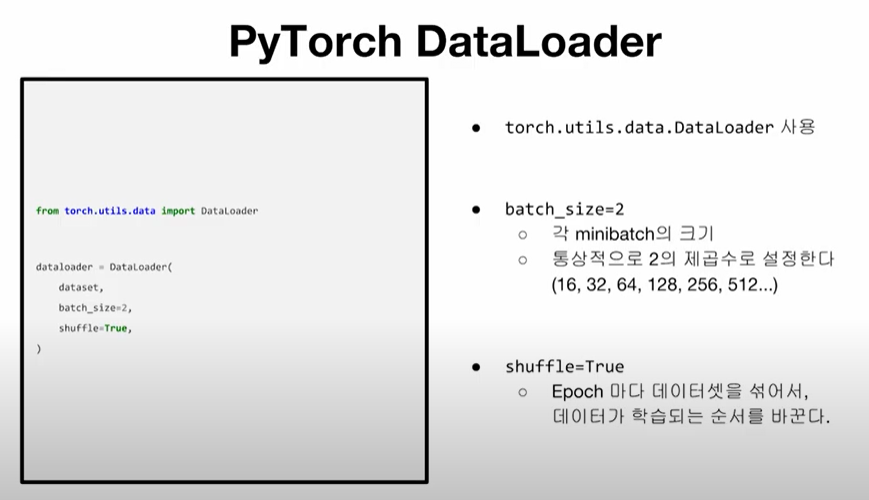

In [13]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=2, # 각 minibatch의 크기 , 통상적으로 2의 제곱수로 설정
    #shuffle=True // Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿈(모델이 데이터의 순서를 외우지 못하게함)
)

**FULL CODE**



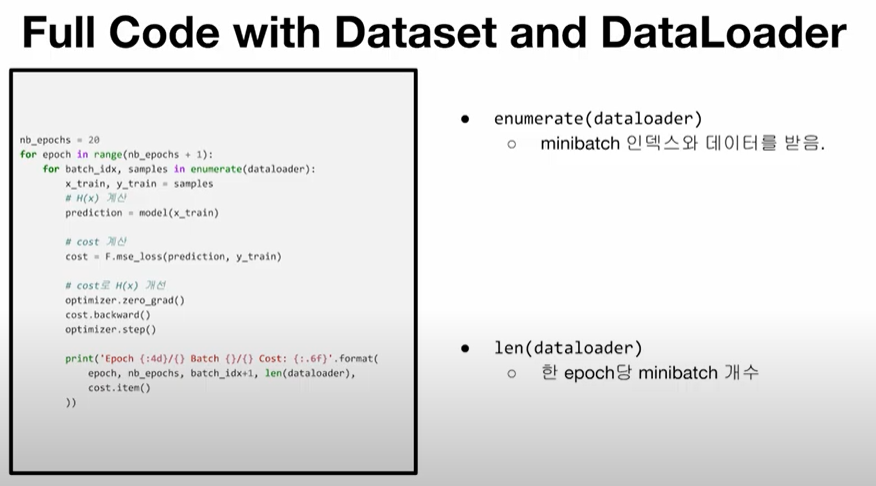